#Anomaly Detection & Time Series Assignment

**Question 1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**
- Anomaly Detection is the process of identifying data points or patterns that deviate significantly from normal behavior.

- Types of anomalies:
  - Point Anomaly: A single data point that is abnormal.
    - Example: A credit card transaction of ₹5,00,000 when usual spending is ₹5,000.

  - Contextual Anomaly: An anomaly that is abnormal in a specific context (time, location, condition).
    - Example: High electricity usage at midnight but normal during the day.

  - Collective Anomaly: A group of data points that are abnormal together.
    - Example: Sudden surge of failed login attempts indicating a cyber-attack.

**Question 2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.**
1. Isolation Forest
    - Isolates anomalies instead of profiling normal data.
    - Works by randomly splitting data.
    - Efficient for large and high-dimensional datasets.

- Use case: Fraud detection, network intrusion detection.

2. DBSCAN
   - Density-based clustering.
   - Points in low-density regions are treated as anomalies.
   - Sensitive to parameter selection (eps, min_samples).

- Use case: Spatial data, geolocation anomalies.

3. Local Outlier Factor (LOF)
   - Measures how isolated a point is relative to its neighbors.
   - Focuses on local density differences.

- Use case: Detecting local anomalies in datasets with varying density.

**Question 3. What are the key components of a Time Series? Explain each with one example.**
- **Trend**
  - Long-term upward or downward movement.
  - Example: Yearly increase in online sales.

- **Seasonality**
  - Repeating pattern over fixed periods.
  - Example: Higher sales during festivals every year.

- **Cyclic**
  - Fluctuations without a fixed period.
  - Example: Economic boom and recession cycles.

- **Irregular (Noise)**
  - Random variations.
  - Example: Sudden drop in sales due to a strike.

**Question 4.  Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?**
- A time series is stationary if its:
  - mean is constant
  - variance is constant
  - autocorrelation is constant over time

1. **Testing stationarity:**
   - Augmented Dickey-Fuller (ADF) test
   - KPSS test
   - Visual inspection (rolling mean and variance)

2. **Making a series stationary:**
   - Differencing
   - Log transformation
   - Detrending
   - Seasonal differencing

- Example:
  - Original series → non-stationary
  - First differencing → stationary

**Question 5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.**
- **AR (AutoRegressive)**
  - Uses past values of the series.
  - Application: When current value depends on previous values.

- **MA (Moving Average)**
  - Uses past forecast errors.
  - Application: When noise impacts current values.

- **ARIMA (p, d, q)**
  - Combination of AR + differencing + MA.
  - Application: Non-stationary time series without seasonality.

- **SARIMA (p, d, q)(P, D, Q, s)**
  - ARIMA with seasonal components.
  - Application: Data with seasonality (monthly, quarterly).

- **SARIMAX**
  - SARIMA + external variables (exogenous features).
  - Application: Forecasting sales using promotions or weather data.

- **Quick Summary:**
  - AR → past values
  - MA → past errors
  - ARIMA → non-stationary
  - SARIMA → seasonal data
  - SARIMAX → seasonal + external factors

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

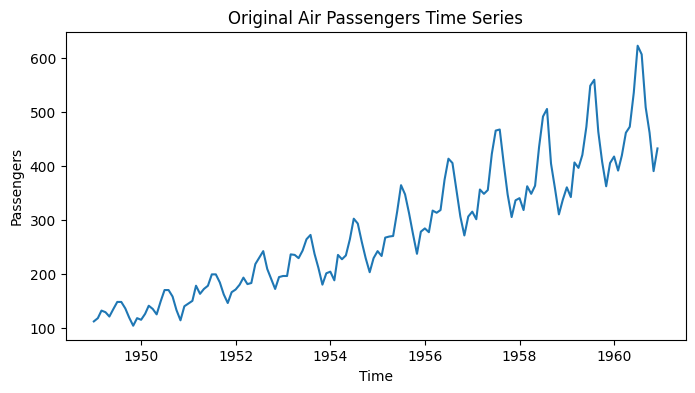

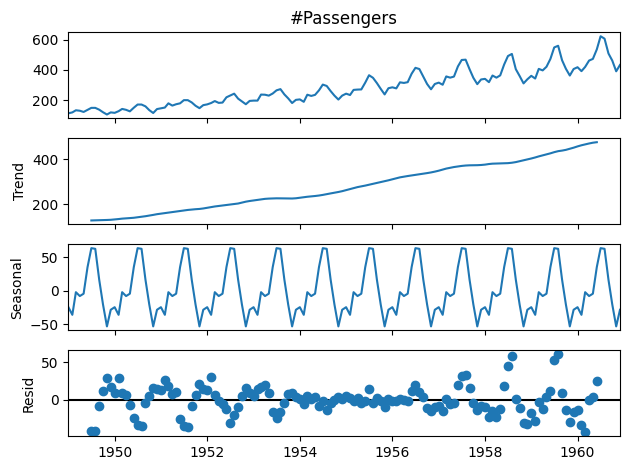

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_csv("AirPassengers.csv")

# Convert to datetime
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plot original series
plt.figure(figsize=(8,4))
plt.plot(df['#Passengers']) # Corrected column name
plt.title("Original Air Passengers Time Series")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.show()

# Decomposition
decomposition = seasonal_decompose(df['#Passengers'], model='additive') # Corrected column name
decomposition.plot()
plt.show()

- **Output / Explanation:**
  - Trend: Long-term increase in airline passengers
  - Seasonality: Repeating yearly travel patterns
  - Residual: Random noise after removing trend and seasonality

**Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.**

/tmp/ipython-input-33100265.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/NYC_taxi_fare_data.csv") # Corrected filename and path


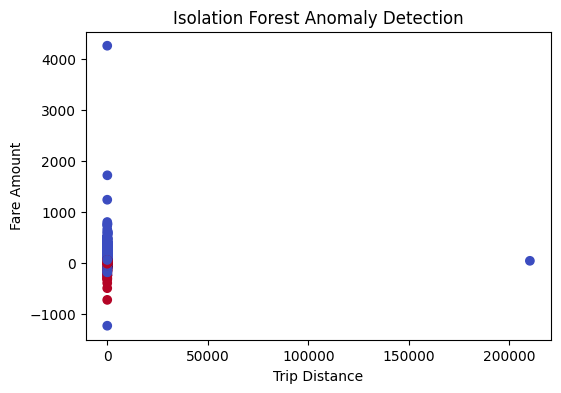

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load dataset
df = pd.read_csv("/content/NYC_taxi_fare_data.csv") # Corrected filename and path

# Use two numeric columns (example)
X = df[['fare_amount', 'trip_distance']].dropna()

# Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=0)
labels = iso.fit_predict(X)

# Add anomaly column
X['anomaly'] = labels

# Plot
plt.figure(figsize=(6,4))
plt.scatter(X['trip_distance'], X['fare_amount'],
            c=X['anomaly'], cmap='coolwarm')
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Isolation Forest Anomaly Detection")
plt.show()

- **Output / Explanation:**
  - Normal points are clustered
  - Red points (−1) represent anomalous fares (fraud or data errors)

**Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.**

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-2086038082.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(


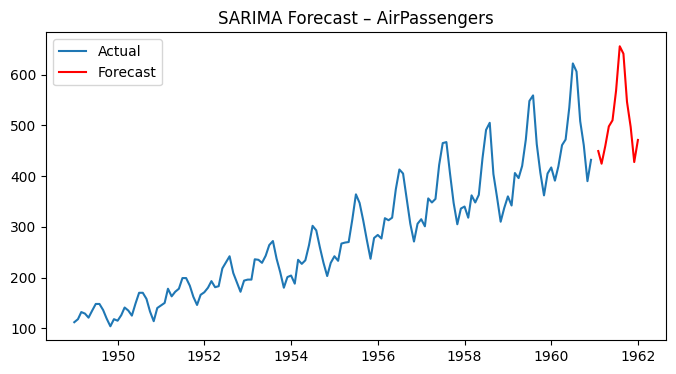

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd # Import pandas again for clarity in this cell

# Reload AirPassengers dataset for this cell to ensure correct data
df = pd.read_csv("AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# SARIMA model
model = SARIMAX(df['#Passengers'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12))
results = model.fit()

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(
    start=df.index[-1], periods=13, freq='M'
)[1:]

forecast_values = forecast.predicted_mean

# Plot
plt.figure(figsize=(8,4))
plt.plot(df['#Passengers'], label="Actual")
plt.plot(forecast_index, forecast_values, label="Forecast", color='red')
plt.legend()
plt.title("SARIMA Forecast – AirPassengers")
plt.show()

- **Output / Explanation:**
  - Forecast shows continued upward trend
  - Seasonal pattern preserved
  - Suitable for monthly airline data

**Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.**

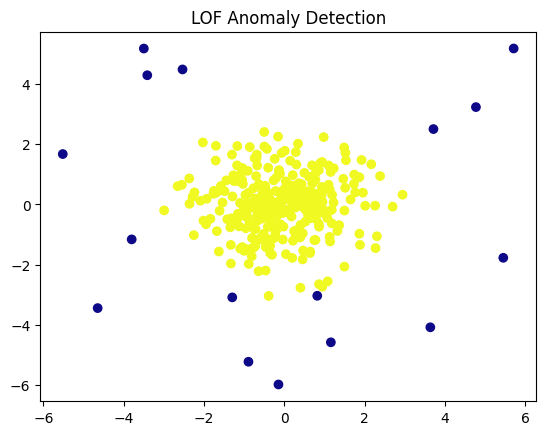

In [8]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Synthetic numeric data
np.random.seed(0)
X = np.random.normal(0, 1, (300, 2))

# Add outliers
outliers = np.random.uniform(-6, 6, (20, 2))
X = np.vstack([X, outliers])

# LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels = lof.fit_predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], c=labels, cmap='plasma')
plt.title("LOF Anomaly Detection")
plt.show()

- **Output / Explanation:**
  - Dense region = normal data
  - Sparse isolated points = anomalies

**Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.**

- Explain your real-time data science workflow:
  - How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
  - Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?
  - How would you validate and monitor the performance over time?
  - How would this solution help business decisions or operations?

In [9]:
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Simulated energy usage
energy = np.random.normal(500, 50, 500)

# Isolation Forest for anomalies
iso = IsolationForest(contamination=0.03)
anomalies = iso.fit_predict(energy.reshape(-1,1))

print("Anomalies detected:", sum(anomalies == -1))

# SARIMAX forecasting
model = SARIMAX(energy, order=(1,1,1), seasonal_order=(1,0,1,96))
results = model.fit()
forecast = results.forecast(steps=10)

print("Next 10 energy demand forecast:")
print(forecast)

Anomalies detected: 15


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Next 10 energy demand forecast:
[501.01212684 501.16977362 505.14247058 500.57573175 500.51045636
 506.25213057 504.01747204 505.50079609 503.8250662  505.33543925]


- **Step-by-Step Explanation:**

  **1. Anomaly Detection (Streaming Data)**
    - Use Isolation Forest for real-time anomaly scoring
    - LOF for local consumption anomalies
    - DBSCAN for spatial region anomalies

  **2. Forecasting Model**
    - Use SARIMAX
    - Includes:
      - seasonality (daily, weekly)
      - external variables (temperature, humidity)

  **3. Validation & Monitoring**
    - Rolling window evaluation
    - Metrics: MAE, RMSE
    - Monitor drift in residuals
    - Retrain models periodically

  **4. Business & Operational Benefits**
    - Early fault detection
    - Prevent blackouts
    - Optimize energy distribution
    - Reduce operational costs

- **Final Summary**
  - Isolation Forest & LOF → anomaly detection
  - SARIMA/SARIMAX → forecasting
  - Real-time monitoring improves grid reliability and cost efficiency